In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopy
import io

#Run this cell and upload the ramen-ratings.csv file from your computer
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ramen-ratings.csv to ramen-ratings.csv
User uploaded file "ramen-ratings.csv" with length 158316 bytes


In [2]:
ramen = pd.read_csv(io.StringIO(uploaded['ramen-ratings.csv'].decode('utf-8')))
ramen


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [3]:
# Quick review of column subsetting and data types:
# Extract and print only the Variety and Country columns from the ramen dataset.
print('Ramen:',ramen[['Variety', 'Country']])
print(ramen[['Stars']])

Ramen:                                                 Variety   Country
0                             T's Restaurant Tantanmen      Japan
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...    Taiwan
2                         Cup Noodles Chicken Vegetable       USA
3                         GGE Ramen Snack Tomato Flavor    Taiwan
4                                       Singapore Curry     India
...                                                 ...       ...
2575  Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...   Vietnam
2576                     Oriental Style Instant Noodles  Thailand
2577                                     Tom Yum Shrimp  Thailand
2578                               Tom Yum Chili Flavor  Thailand
2579                                         Miso Ramen       USA

[2580 rows x 2 columns]
     Stars
0     3.75
1        1
2     2.25
3     2.75
4     3.75
...    ...
2575   3.5
2576     1
2577     2
2578     2
2579   0.5

[2580 rows x 1 columns]


In [4]:
# Run this describe function to see a summary of the data. Compare to the printed
# DataFrame above.
# Which columns did you expect to be numeric? Which ones are actually numeric?

ramen.describe()
print('Ramen describe:',ramen.describe())

# To see what the data types are of each column in the DataFrame.
ramen.dtypes
print('Ramen Type:', ramen.dtypes)

Ramen describe:           Review #
count  2580.000000
mean   1290.500000
std     744.926171
min       1.000000
25%     645.750000
50%    1290.500000
75%    1935.250000
max    2580.000000
Ramen Type: Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object


In [6]:
# Expect 'Stars' colunm is numeric. To attempt to convert the column to
# a numeric one. It will not work.
#pd.to_numeric(ramen['Stars'])

In [7]:
# To convert to numeric, we need to tell pandas what to do if the value cannot
# be converted to a numeric value, for example if the value is "Unrated".
# Look at this documentation and select the option to convert non-numeric items to a NaN or missing value.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
# Hint: it will look like this:
pd.to_numeric(ramen['Stars'],errors='coerce')


,Stars
0,3.75
1,1.00
2,2.25
3,2.75
4,3.75
...,...
2575,3.50
2576,1.00
2577,2.00
2578,2.00


In [8]:
# Once the line above works and gives you a Series output, save to a new column
# in the data frame called "rating".
# Hint: See "Adding a column" in the tutorial

ramen['Rating'] = pd.to_numeric(ramen['Stars'],errors='coerce')
print('Ramen:', ramen)

Ramen:       Review #           Brand  \
0         2580       New Touch   
1         2579        Just Way   
2         2578          Nissin   
3         2577         Wei Lih   
4         2576  Ching's Secret   
...        ...             ...   
2575         5           Vifon   
2576         4         Wai Wai   
2577         3         Wai Wai   
2578         2         Wai Wai   
2579         1        Westbrae   

                                                Variety Style   Country Stars  \
0                             T's Restaurant Tantanmen    Cup     Japan  3.75   
1     Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack    Taiwan     1   
2                         Cup Noodles Chicken Vegetable   Cup       USA  2.25   
3                         GGE Ramen Snack Tomato Flavor  Pack    Taiwan  2.75   
4                                       Singapore Curry  Pack     India  3.75   
...                                                 ...   ...       ...   ...   
2575  Hu Tiu Nam 

In [9]:
# Run the describe command to see what the updated numeric variables are like.
# Answer the question: From the describe output, how many values of Stars were missing?

ramen.describe()
print('Ramen describe:',ramen.describe())


# To see what the data types are of each column in the DataFrame.
ramen.dtypes
print('Ramen Type:', ramen.dtypes)



Ramen describe:           Review #       Rating
count  2580.000000  2577.000000
mean   1290.500000     3.654676
std     744.926171     1.015331
min       1.000000     0.000000
25%     645.750000     3.250000
50%    1290.500000     3.750000
75%    1935.250000     4.250000
max    2580.000000     5.000000
Ramen Type: Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars        object
Top Ten      object
Rating      float64
dtype: object


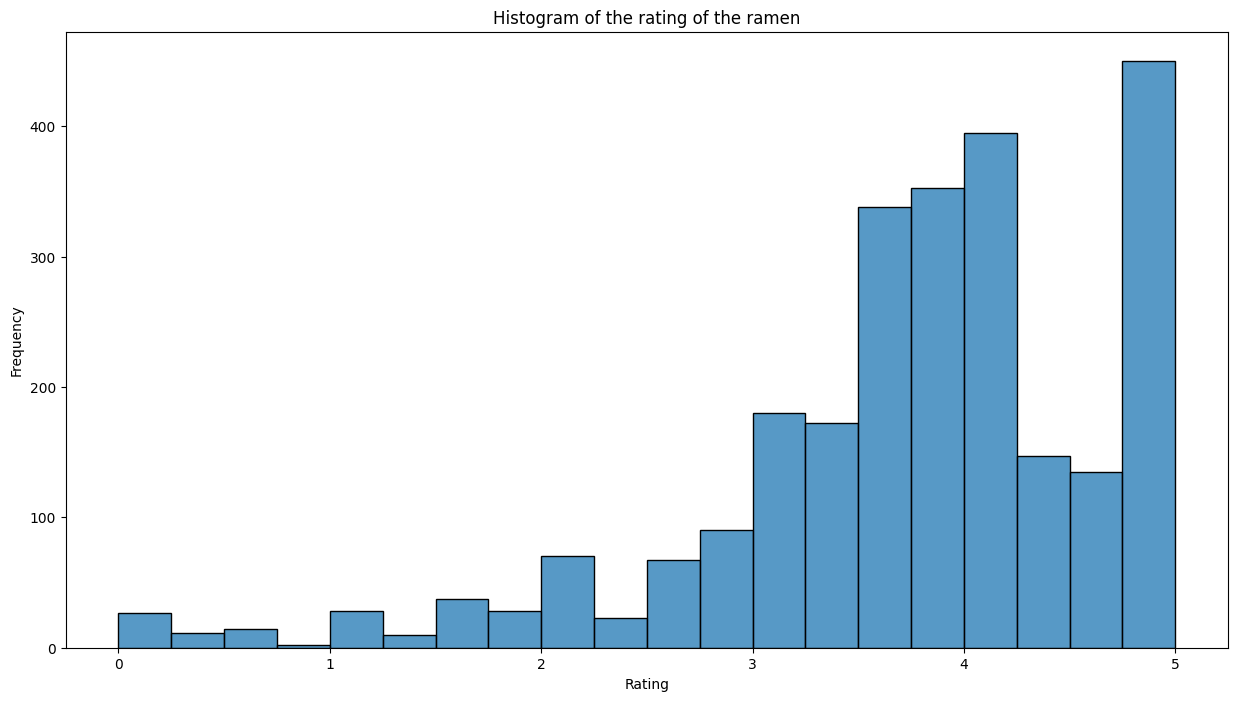

In [10]:
#Use seaborn to plot a histogram of the ramen ratings with 10 bins.
plt.figure(figsize = (15,8))
ax = sns.histplot(x="Rating", bins=20, data=ramen)
ax.set_ylabel('Frequency')
ax.set_xlabel('Rating')
ax.set_title("Histogram of the rating of the ramen")
plt.show()



In [11]:
#how many suvery per country.

print(ramen.groupby(['Country']).size())

Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            169
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         156
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           224
Thailand         191
UK                69
USA              323
United States      1
Vietnam          108
dtype: int64


In [12]:
print(ramen.groupby(['Country']).count())

               Review #  Brand  Variety  Style  Stars  Top Ten  Rating
Country                                                               
Australia            22     22       22     22     22        0      22
Bangladesh            7      7        7      7      7        0       7
Brazil                5      5        5      5      5        0       5
Cambodia              5      5        5      5      5        0       5
Canada               41     41       41     41     41        0      41
China               169    169      169    168    169        1     169
Colombia              6      6        6      6      6        0       6
Dubai                 3      3        3      3      3        0       3
Estonia               2      2        2      2      2        0       2
Fiji                  4      4        4      4      4        0       4
Finland               3      3        3      3      3        0       3
Germany              27     27       27     27     27        0      27
Ghana 

In [13]:

# how many ratings there are for each Country.
print(ramen.groupby(['Country'])['Rating'].count())

Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            169
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         155
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      307
Sweden             3
Taiwan           224
Thailand         191
UK                69
USA              323
United States      1
Vietnam          108
Name: Rating, dtype: int64


In [14]:
# Notice that there are both United States and USA listed.
# Correct it by running this line of code:
ramen['Country'] = ramen['Country'].str.replace('USA','United States')
print(ramen['Country'])

0               Japan
1              Taiwan
2       United States
3              Taiwan
4               India
            ...      
2575          Vietnam
2576         Thailand
2577         Thailand
2578         Thailand
2579    United States
Name: Country, Length: 2580, dtype: object


In [15]:
# With the data cleaned, re-run the code you wrote 2 cells up giving the number of counts per country,

ramen.groupby(['Country']).size()
print(ramen.groupby(['Country']).size())
print(type(ramen.groupby(['Country']).size()))





Country
Australia         22
Bangladesh         7
Brazil             5
Cambodia           5
Canada            41
China            169
Colombia           6
Dubai              3
Estonia            2
Fiji               4
Finland            3
Germany           27
Ghana              2
Holland            4
Hong Kong        137
Hungary            9
India             31
Indonesia        126
Japan            352
Malaysia         156
Mexico            25
Myanmar           14
Nepal             14
Netherlands       15
Nigeria            1
Pakistan           9
Philippines       47
Poland             4
Sarawak            3
Singapore        109
South Korea      309
Sweden             3
Taiwan           224
Thailand         191
UK                69
United States    324
Vietnam          108
dtype: int64
<class 'pandas.core.series.Series'>


In [16]:

# saving it to a variable called count_by_countries. Print the variable name to check it.
# Notice this gives us a Series, not a DataFrame.

count_by_countries = pd.DataFrame(ramen.groupby(['Country']).size())
print(count_by_countries)
print(type(count_by_countries))
count_by_countries

                 0
Country           
Australia       22
Bangladesh       7
Brazil           5
Cambodia         5
Canada          41
China          169
Colombia         6
Dubai            3
Estonia          2
Fiji             4
Finland          3
Germany         27
Ghana            2
Holland          4
Hong Kong      137
Hungary          9
India           31
Indonesia      126
Japan          352
Malaysia       156
Mexico          25
Myanmar         14
Nepal           14
Netherlands     15
Nigeria          1
Pakistan         9
Philippines     47
Poland           4
Sarawak          3
Singapore      109
South Korea    309
Sweden           3
Taiwan         224
Thailand       191
UK              69
United States  324
Vietnam        108
<class 'pandas.core.frame.DataFrame'>


,0
Country,
Australia,22
Bangladesh,7
Brazil,5
Cambodia,5
Canada,41
China,169
Colombia,6
Dubai,3
Estonia,2


In [17]:
"""
Notice that the output is a bit strange: the country is in bold, and depending on the strategy you chose above,
the count may be labeled "Country". Earlier in this lab, we learned that the index of a row is not necessarily the row number;
it is really a row identifier. We converted one of the columns to a row identifier, or index, using set_index().

Here we're in the opposite situation: the index contains the information that we actually want in a column.
We will convert the index to a column using reset_index().
"""
count_by_countries.reset_index()

print(count_by_countries.reset_index())
count_by_countries


          Country    0
0       Australia   22
1      Bangladesh    7
2          Brazil    5
3        Cambodia    5
4          Canada   41
5           China  169
6        Colombia    6
7           Dubai    3
8         Estonia    2
9            Fiji    4
10        Finland    3
11        Germany   27
12          Ghana    2
13        Holland    4
14      Hong Kong  137
15        Hungary    9
16          India   31
17      Indonesia  126
18          Japan  352
19       Malaysia  156
20         Mexico   25
21        Myanmar   14
22          Nepal   14
23    Netherlands   15
24        Nigeria    1
25       Pakistan    9
26    Philippines   47
27         Poland    4
28        Sarawak    3
29      Singapore  109
30    South Korea  309
31         Sweden    3
32         Taiwan  224
33       Thailand  191
34             UK   69
35  United States  324
36        Vietnam  108


,0
Country,
Australia,22
Bangladesh,7
Brazil,5
Cambodia,5
Canada,41
China,169
Colombia,6
Dubai,3
Estonia,2


In [18]:
# We see that reset_index() showed us what a copy of the DataFrame would look like
# if we used the function, but it did not save changes to the DataFrame.
# To save changes, we'll add this in between the parentheses:
# inplace=True
# Keep this in mind; this option for inplace occurs in many other pandas methods
# as well.

count_by_countries.reset_index(inplace=True)
count_by_countries



,Country,0
0,Australia,22
1,Bangladesh,7
2,Brazil,5
3,Cambodia,5
4,Canada,41
5,China,169
6,Colombia,6
7,Dubai,3
8,Estonia,2
9,Fiji,4


In [19]:
# Depending on how you counted the number of ratings per country, the column names
# may now be off. Let's rename them appropriately so we can all work from the same
# point. Run this code to fix it and check:
count_by_countries.columns = ['Country','count']
print(count_by_countries.columns)
print(count_by_countries)

Index(['Country', 'count'], dtype='object')
          Country  count
0       Australia     22
1      Bangladesh      7
2          Brazil      5
3        Cambodia      5
4          Canada     41
5           China    169
6        Colombia      6
7           Dubai      3
8         Estonia      2
9            Fiji      4
10        Finland      3
11        Germany     27
12          Ghana      2
13        Holland      4
14      Hong Kong    137
15        Hungary      9
16          India     31
17      Indonesia    126
18          Japan    352
19       Malaysia    156
20         Mexico     25
21        Myanmar     14
22          Nepal     14
23    Netherlands     15
24        Nigeria      1
25       Pakistan      9
26    Philippines     47
27         Poland      4
28        Sarawak      3
29      Singapore    109
30    South Korea    309
31         Sweden      3
32         Taiwan    224
33       Thailand    191
34             UK     69
35  United States    324
36        Vietnam    108


In [20]:
"""

In this section, we'll look at:
- Merging (i.e. joining) two data frames
- Another split-apply-combine example
- Ordering a bar plot by values

Extract data for the countries that make the most ramen and create a barplot

Suppose we want to take a closer look at only the countries that produce a lot of raman. Let's filter out the countries that have > 100 ramen ratings.

There are probably many ways to do this, and you are welcome to think up your  own, if you wish. I will walk you through one.
"""

"\n\nIn this section, we'll look at:\n- Merging (i.e. joining) two data frames\n- Another split-apply-combine example\n- Ordering a bar plot by values\n\nExtract data for the countries that make the most ramen and create a barplot\n\nSuppose we want to take a closer look at only the countries that produce a lot of raman. Let's filter out the countries that have > 100 ramen ratings.\n\nThere are probably many ways to do this, and you are welcome to think up your  own, if you wish. I will walk you through one.\n"

In [21]:
# Now use row selection to select all lines where the count is greater than 100.
# Save this to a variable called ramen_countries.

ramen_countries = count_by_countries[count_by_countries['count'] > 100]
print(ramen_countries)

          Country  count
5           China    169
14      Hong Kong    137
17      Indonesia    126
18          Japan    352
19       Malaysia    156
29      Singapore    109
30    South Korea    309
32         Taiwan    224
33       Thailand    191
35  United States    324
36        Vietnam    108


In [22]:
# Join this data frame with the original data frame to retain only countries
# with more than 100 ramen varieties.
# We will put ramen on the left and ramen_countries on the right, like this:
# ramen.merge(ramen_countries,how='',on='')
# You will determine what goes into each of those quotations.
# How: if we only want the rows from the countries in ramen_countries, how
# should we do this join? Options: inner, outer, left, right
# On: Which column name is in common between these datasets that we want to use to tell
# pandas how to join the data?

ramen_top_countries = ramen.merge(ramen_countries,how='inner',on='Country')
print(ramen_top_countries)

      Review #                   Brand                                Variety  \
0         2580               New Touch              T's Restaurant Tantanmen    
1         2574                 Acecook    Spice Deli Tantan Men With Cilantro   
2         2573             Ikeda Shoku                  Nabeyaki Kitsune Udon   
3         2572              Ripe'n'Dry               Hokkaido Soy Sauce Ramen   
4         2567                  Nissin           Deka Buto Kimchi Pork Flavor   
...        ...                     ...                                    ...   
2200       133                  Baijia                 Hot & Sour Rice Noodle   
2201        90                Long Kow  Crystal Noodle Six Kinds Of Mushrooms   
2202        69                  Baijia   Spicy Fei- Chang Sweet Potato Noodle   
2203        55  Hua Feng Noodle Expert                    Favoury Pork Flavor   
2204        54  Hua Feng Noodle Expert                   Spicy Seafood Flavor   

     Style Country Stars To

In [23]:
# Check your work by running this line summing the count of ramen_countries.
# This number should *almost* match the number of rows above (differing perhaps
# by a small number of missing ratings).

numOfRows = len(ramen.index)
print('Number of Rows in ramen : ' , numOfRows)
numOfRows = len(ramen_top_countries.index)
print('Number of Rows in ramen_top_countries : ' , numOfRows)

Number of Rows in ramen :  2580
Number of Rows in ramen_top_countries :  2205


<ipython-input-24-cc762aab636b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Country', y='count', ci=None, data=ramen_top_countries)


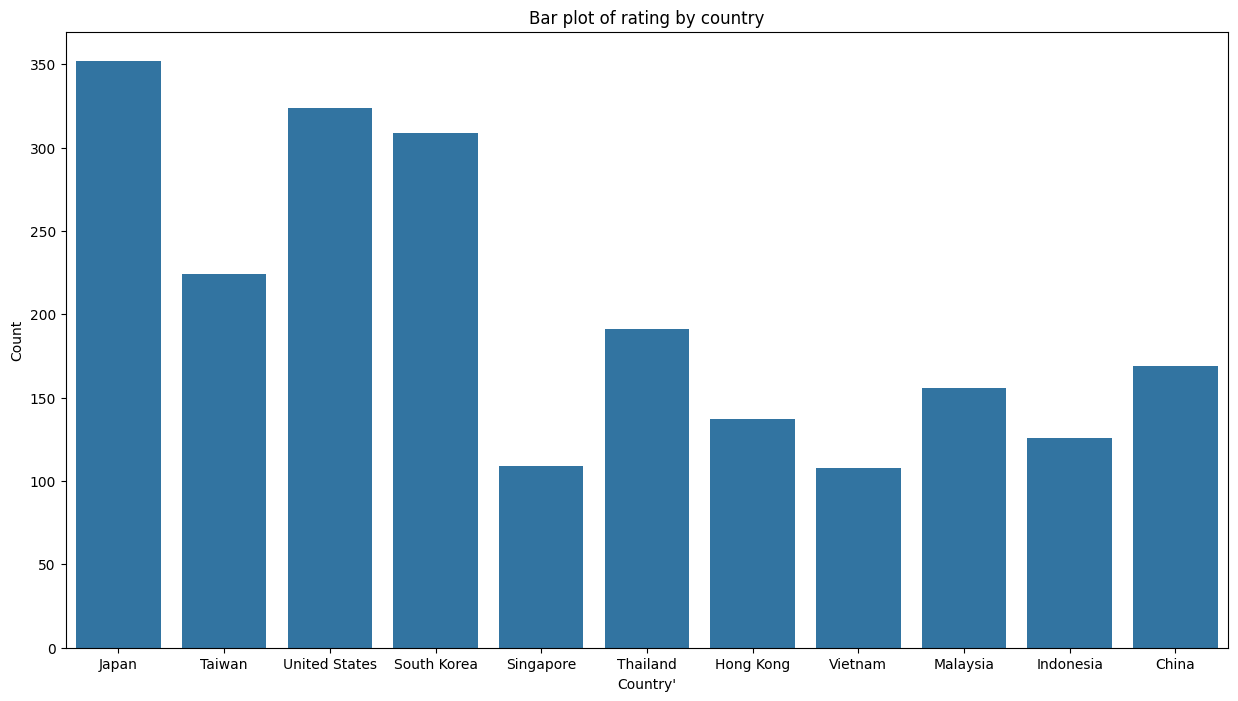

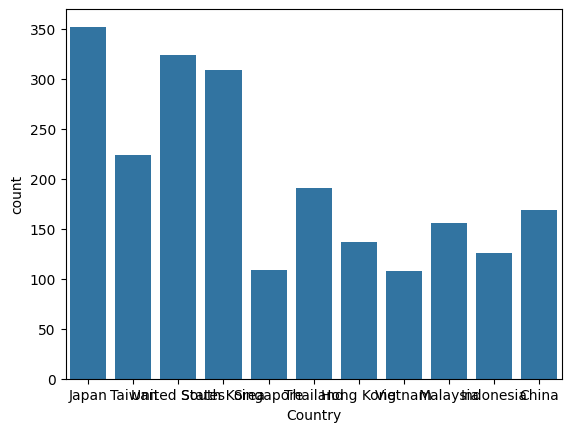

In [24]:
# Use the seaborn barplot command to make a bar plot of rating by country from
# the ramen_top_countries data.
# Choose the best orientation of x vs y so that you can read the labels.
# Also include the option ci=None in the parentheses.
# In frequentist statistics, a confidence interval (CI) is a range of estimates for an unknown parameter.
# To remove the confidence interval by setting the ci parameter to None

plt.figure(figsize = (15,8)) # Use the matplotlib.pyplot.figure() Function to Change the Size of a Seaborn Plot
ax = sns.barplot(x='Country', y='count', ci=None, data=ramen_top_countries)
ax.set_ylabel("Count")
ax.set_xlabel("Country'")
ax.set_title("Bar plot of rating by country")
plt.show()

ax = sns.barplot(x='Country', y='count', data=ramen_top_countries)
plt.show()

In [25]:
# We would prefer to have this ordered.
# We want to get a DataFrame with the country, rating, and (for later use) count.
# Spoiler alert: if you want to figure this out yourself, don't keep reading this cell.

# Otherwise, let's walk through this together.

# We want one line per country, so group by country like this:
ramen_top_countries.groupby("Country")

# Here's an option that prevents the need for all the index resetting:
ramen_top_countries.groupby("Country",as_index=False)

# We want the rating and count for each country, so select those columns.
# Remember that we need two sets of brackets to select multiple columns, because
# the inner brackets are giving the list of columns.
ramen_top_countries.groupby("Country",as_index=False)[['Rating','count']]

# We want the mean rating for each country. (We want the actual count, but that value
# is already repeated in every row, so the mean of all the same number will just be
# that number.) Apply the mean function to the code so far.
# ramen_top_countries.groupby("Country",as_index=False)[['rating','count']].mean()

pd.DataFrame(ramen_top_countries.groupby("Country",as_index=False)[['Rating','count']].mean())


,Country,Rating,count
0,China,3.421893,169.0
1,Hong Kong,3.801825,137.0
2,Indonesia,4.067460,126.0
3,Japan,3.981605,352.0
4,Malaysia,4.154194,156.0
5,Singapore,4.126147,109.0
6,South Korea,3.790554,309.0
7,Taiwan,3.665402,224.0
8,Thailand,3.384817,191.0
9,United States,3.457948,324.0


In [26]:
# Now sort this by the rating. We want it descending, so we'll set ascending to False.
# Save this as ramen_rating_by_country.

ramen_rating_by_country = pd.DataFrame(ramen_top_countries.groupby("Country",as_index=False)[['Rating','count']].mean()).sort_values('Rating',ascending=False)
ramen_rating_by_country

,Country,Rating,count
4,Malaysia,4.154194,156.0
5,Singapore,4.126147,109.0
2,Indonesia,4.067460,126.0
3,Japan,3.981605,352.0
1,Hong Kong,3.801825,137.0
6,South Korea,3.790554,309.0
7,Taiwan,3.665402,224.0
9,United States,3.457948,324.0
0,China,3.421893,169.0
8,Thailand,3.384817,191.0


<ipython-input-27-243d8f3e5baa>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Country', y='Rating', ci=None, data=ramen_rating_by_country)


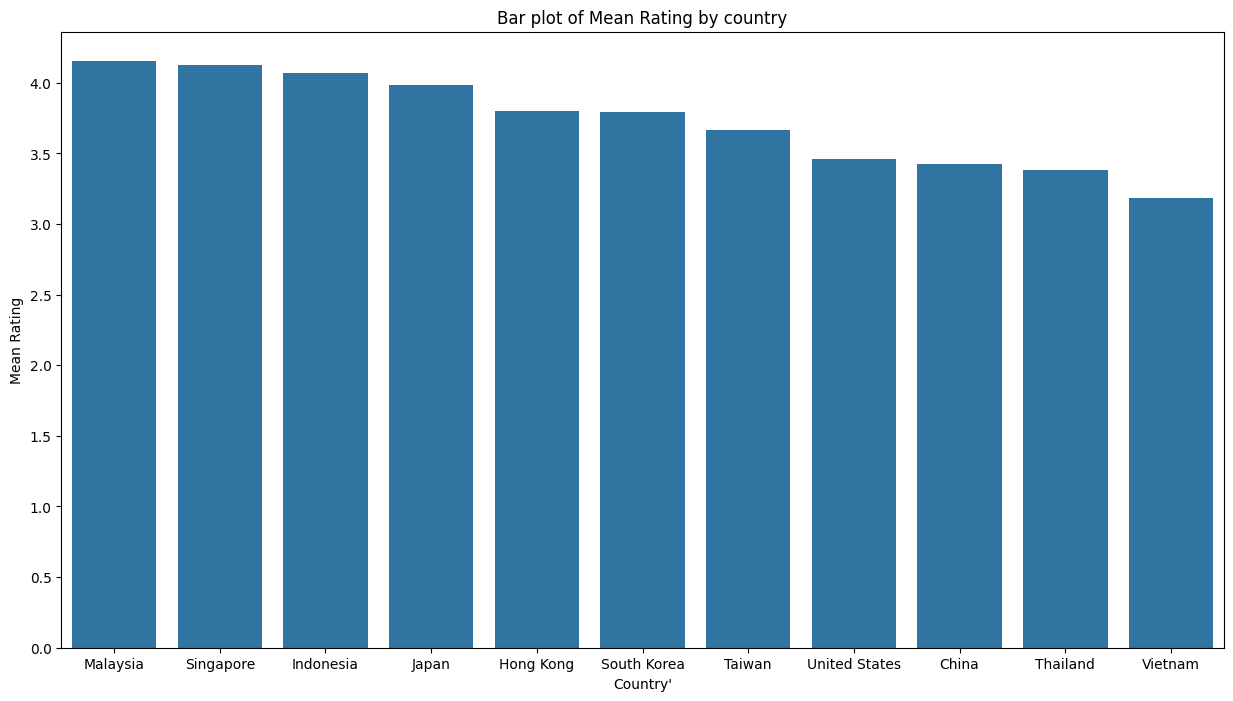

In [27]:
# Create a barplot of country vs. rating using ramen_rating_by_country.
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Country', y='Rating', ci=None, data=ramen_rating_by_country)
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Country'")
ax.set_title("Bar plot of Mean Rating by country")
plt.show()

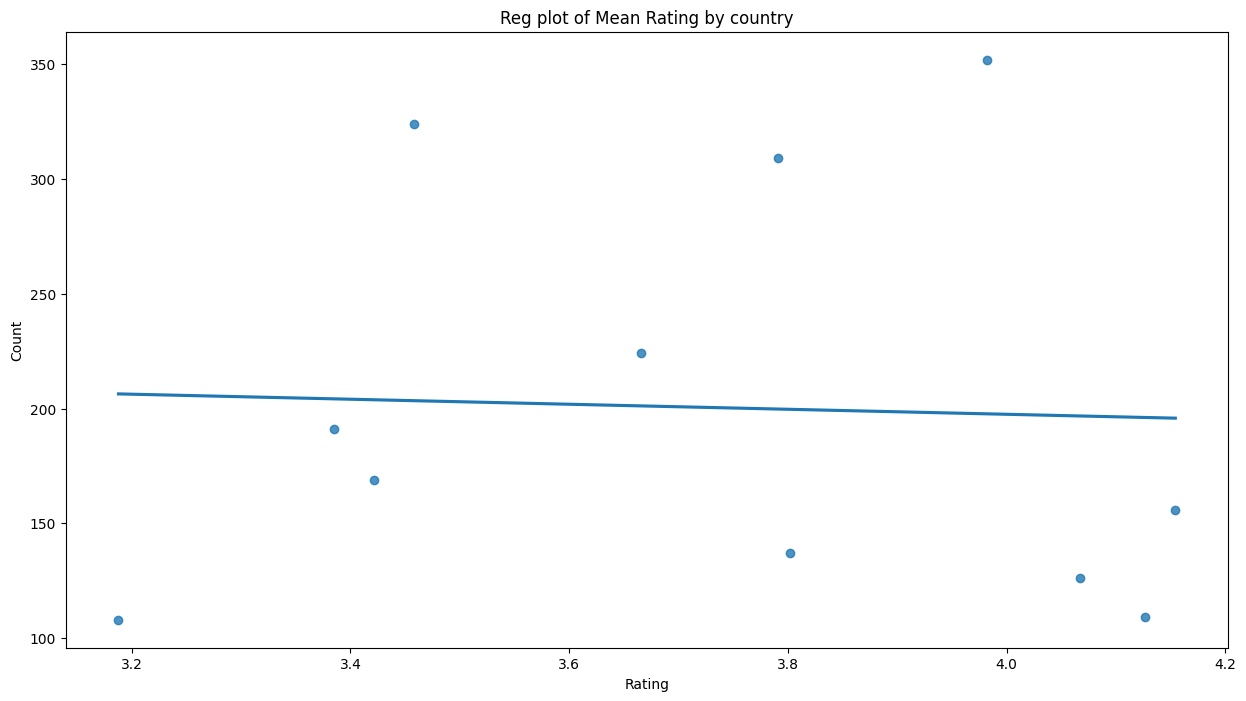

In [28]:
# Use regplot to create a scatterplot of rating vs. count, which is essentially
# quality vs. quantity. Regplot will automatically apply a best-fit line.
plt.figure(figsize = (15,8))
ax = sns.regplot(x='Rating', y='count', ci=None, data=ramen_rating_by_country)
ax.set_xlabel("Rating")
ax.set_ylabel("Count")
ax.set_title("Reg plot of Mean Rating by country")
plt.show()

# Based on the plot above, is there a quality vs. quantity tradeoff?
# In other words, does the mean rating seem to be related to the number of types
# of ramen that the country produces?
# (Consider the correlation of these variables, or the algebra of the best-fit line.)

In [29]:
"""
Let's put together what we've covered in Pandas for the following exercises. Please see the Canvas lab page for hints as needed.

Important: for these exercises, do not hard code row numbers. (i.e., The solutions should work on another similar data set.)

All of these answers will be tables (i.e. no plots).
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Given a DataFrame from this data. **Do not change this cell!
# Run this cell to load the data.
d = {'category':['citrus','flower','flower','succulent','flower','citrus','vegetable','vegetable','succulent'],\
     'num_in_stock':[19,14,23,30,144,10,345,26,27],\
     'edible':[True,False,True,False,False,True,True,True,False],\
     'decorative': [False,True,True,True,True,False,False,True,True],\
     'unneeded':[3.44,-4.56,3.26,7.32,79.234,-453,445,995,0.48]}
plants = pd.DataFrame(d,index=['Lemon','Camelia','Lavender','Jade','Rose','Lime','Tomato','Flowering Kale','Aeonium Sunburst'])
plants

,category,num_in_stock,edible,decorative,unneeded
Lemon,citrus,19,True,False,3.440
Camelia,flower,14,False,True,-4.560
Lavender,flower,23,True,True,3.260
Jade,succulent,30,False,True,7.320
Rose,flower,144,False,True,79.234
Lime,citrus,10,True,False,-453.000
Tomato,vegetable,345,True,False,445.000
Flowering Kale,vegetable,26,True,True,995.000
Aeonium Sunburst,succulent,27,False,True,0.480


In [30]:
# Run this to see the data types of the columns of this data frame.
plants.dtypes

,0
category,object
num_in_stock,int64
edible,bool
decorative,bool
unneeded,float64


In [31]:
# One column is not needed (and named "unneeded"). Permanently remove
# this column from the plants data without including the code "plants =..."

del plants['unneeded']
print(plants)


                   category  num_in_stock  edible  decorative
Lemon                citrus            19    True       False
Camelia              flower            14   False        True
Lavender             flower            23    True        True
Jade              succulent            30   False        True
Rose                 flower           144   False        True
Lime                 citrus            10    True       False
Tomato            vegetable           345    True       False
Flowering Kale    vegetable            26    True        True
Aeonium Sunburst  succulent            27   False        True


In [32]:
# Display the entire row only for plants that are both edible and decorative.
# Use DataFrame.loc attribute to access a particular cell in the given Dataframe using the index and column labels.

print(plants.loc[(plants['edible'] == True) & (plants['decorative'] == True)])



                 category  num_in_stock  edible  decorative
Lavender           flower            23    True        True
Flowering Kale  vegetable            26    True        True


In [33]:
# Display the total number of plants in stock for each category.

#print(plants.groupby('category')['num_in_stock'].sum())
plants_category = pd.Series(plants.groupby('category')['num_in_stock'].sum(), name='count').reset_index()
print(type(plants_category))
plants_category


<class 'pandas.core.frame.DataFrame'>


,category,count
0,citrus,29
1,flower,181
2,succulent,57
3,vegetable,371


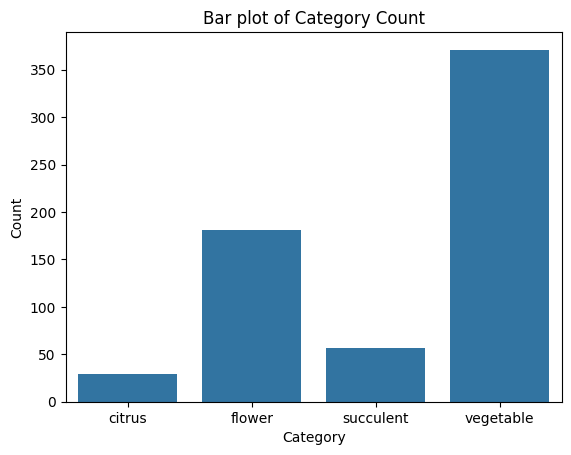

In [34]:
#plt.figure(figsize = (15,8)) # Use the matplotlib.pyplot.figure() Function to Change the Size of a Seaborn Plot
ax = sns.barplot(x='category', y='count', data=plants_category)
ax.set_ylabel("Count")
ax.set_xlabel("Category")
ax.set_title("Bar plot of Category Count")
plt.show()


In [38]:
# Get the total number of plants in stock for the plant names that start with "L".
# This one is a challenge

index = plants.index
print(index)

def condition(x):
  return x.startswith('L')

conditioned_index = [idx for idx, element in enumerate(plants.index) if condition(element)]
print(conditioned_index)

print(plants.iloc[conditioned_index])

print("Total: ", plants.iloc[conditioned_index]['num_in_stock'].sum())




Index(['Lemon', 'Camelia', 'Lavender', 'Jade', 'Rose', 'Lime', 'Tomato',
       'Flowering Kale', 'Aeonium Sunburst'],
      dtype='object')
[0, 2, 5]
         category  num_in_stock  edible  decorative
Lemon      citrus            19    True       False
Lavender   flower            23    True        True
Lime       citrus            10    True       False
Total:  52


In [41]:
# explain: conditioned_index = [idx for idx, element in enumerate(plants.index) if condition(element)]
print(plants.index) # i.e Index
conditioned_index2 = []
for index in plants.index:
  if index.startswith('L') == True:
    print(f'{index} - yes')
    conditioned_index2.append(index)
  else:
    print(f'{index} - no')

print(conditioned_index2)

Index(['Lemon', 'Camelia', 'Lavender', 'Jade', 'Rose', 'Lime', 'Tomato',
       'Flowering Kale', 'Aeonium Sunburst'],
      dtype='object')
Lemon - yes
Camelia - no
Lavender - yes
Jade - no
Rose - no
Lime - yes
Tomato - no
Flowering Kale - no
Aeonium Sunburst - no
['Lemon', 'Lavender', 'Lime']
